# Image processing
by Shadi Alameddin <alameddin@mib.uni-stuttgart.de>, December 2020

additional material for the course _Data processing for engineers and scientists_ at the University of Stuttgart

## Content

### Part 1: image manipulation
- How to read and write images
- Manipulate individual pixels of an image
- Convert RGB image to a grayscale one

### Part 2: image segmentation
- Non-binary segmentation
- Smoothing filters
- Binary segmentation

### Part 3: binary image manipulation
- Morphological operations
- Circle detection algorithm
- Extract sttistical infromation from an image

### Optional: some ideas
- Improve the output of the circle detection algorithm
- Segment the full image instead of the sample we used here
- Use more than one morphological operation to achieve a better result
- Try to isolate the cracks in the particles
- Elaborate on the provided examples to build a basic __traffic-sign recognition system__

## Part 1: loading and manipulating images
__given__: an RGB image file with pixels in $$ \mathbb{A} = \{0,\cdots,255\}^3$$
- load it into Python (use `matplotlib` and `cv2`: OpenCV)
- visualise it
- delete some rows or columns of the image
- compress it to a grayscale image

In [1]:
# pip install opencv-python
import numpy as np
import cv2 as cv 
from matplotlib import rc
import matplotlib.pyplot as plt

rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'], 'size':16})
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.rcParams['axes.grid']=True


matrix shape of the original image(1960, 2588, 3)
imported image has 1960 pixels vertically and 2588 horizontally
minumum and maximum values in the original matrix: (0, 255)
matrix shape of the grayscale image (1960, 2588)
minumum and maximum values in the grayscale matrix: (0, 255)


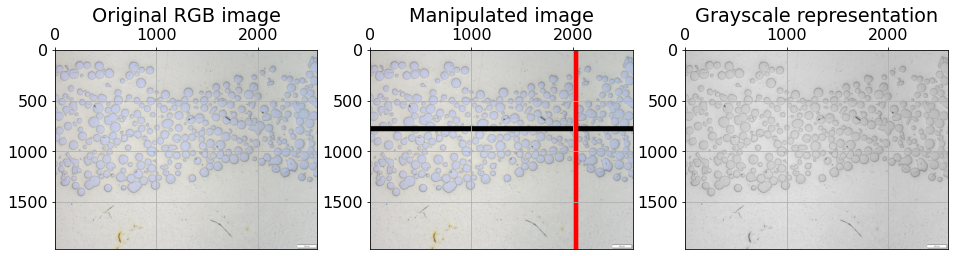

In [2]:
original_image_rgb = plt.imread('input_image/micrograph.tif')

fig, ax= plt.subplots(1,3,figsize=[16,4])
ax[0].imshow(original_image_rgb)
ax[0].set_title('Original RGB image')

corrupted_image = np.copy(original_image_rgb)
corrupted_image[750:800,:,:]=0
corrupted_image[:,2000:2050,:]=[255,0,0]
ax[1].imshow(corrupted_image)
ax[1].set_title('Manipulated image')

original_image_gray = cv.cvtColor(original_image_rgb,cv.COLOR_RGB2GRAY)
ax[2].imshow(original_image_gray,cmap="gray")
ax[2].set_title('Grayscale representation')

print(f'matrix shape of the original image{original_image_rgb.shape}')
print(f'imported image has {original_image_rgb.shape[0]} pixels vertically and {original_image_rgb.shape[1]} horizontally')
print(f'minumum and maximum values in the original matrix: {original_image_rgb.min(),original_image_rgb.max()}')
print(f'matrix shape of the grayscale image {original_image_gray.shape}')
print(f'minumum and maximum values in the grayscale matrix: {original_image_gray.min(),original_image_gray.max()}')

## Part 2: image segmentation
- crop a small "_representative_" sample of the grayscale image
- look at the values of each pixel
- set a "_reasonable_" threshold -> first segmented version (non-binary segmentation)
- smooth the image using Gaussian filter
- convert the image to a binary segmented one
- repeat the process using the RGB image
- what about making only one dominant color in each pixel?

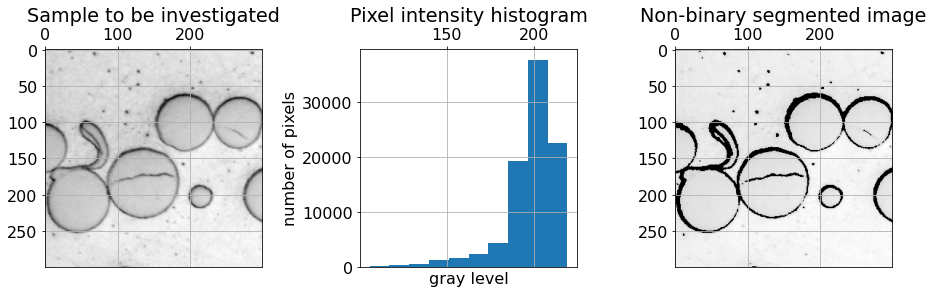

In [3]:
yrange = np.arange(50,350)[:,None]
xrange = np.arange(50,350)[None,:]
image=original_image_rgb[yrange,xrange,:]
image_gray=original_image_gray[yrange,xrange]

fig, ax= plt.subplots(1,3,figsize=[16,4])
ax[0].set_title('Sample to be investigated')
ax[0].imshow(image_gray,cmap="gray")

ax[1].set_title('Pixel intensity histogram')
ax[1].hist(image_gray.flatten())
ax[1].set_box_aspect(1)
ax[1].set_xlabel('gray level')
ax[1].set_ylabel('number of pixels')

# TODO: look at cv.THRESH_BINARY
segmented_image_gray = np.copy(image_gray)
rng = segmented_image_gray<=175
segmented_image_gray[rng]=0
ax[2].set_title('Non-binary segmented image')
ax[2].imshow(segmented_image_gray,cmap="gray")

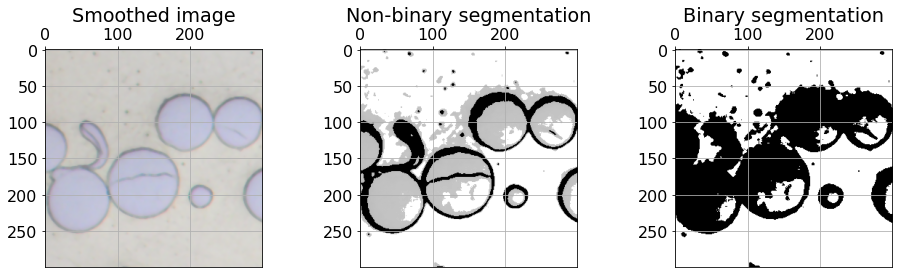

In [4]:
kernel_size = 5
# segmented_image_gray = cv.GaussianBlur(image,(kernel_size,kernel_size),0)
smoothed_image = cv.medianBlur(image,kernel_size)
fig, ax= plt.subplots(1,3,figsize=[16,4])
ax[0].set_title('Smoothed image')
ax[0].imshow(smoothed_image,cmap="gray")

segmented_image_gray = cv.cvtColor(smoothed_image,cv.COLOR_RGB2GRAY)
segmented_image_gray[segmented_image_gray<=185]=0
segmented_image_gray[segmented_image_gray>=198]=255
ax[1].set_title('Non-binary segmentation')
ax[1].imshow(segmented_image_gray,cmap="gray")

binary_image = segmented_image_gray
rng=segmented_image_gray<=200
segmented_image_gray[rng]= 0
segmented_image_gray[~rng] = 1
ax[2].set_title('Binary segmentation')
ax[2].imshow(binary_image,cmap="gray")

Text(0, 0.5, 'number of pixels')

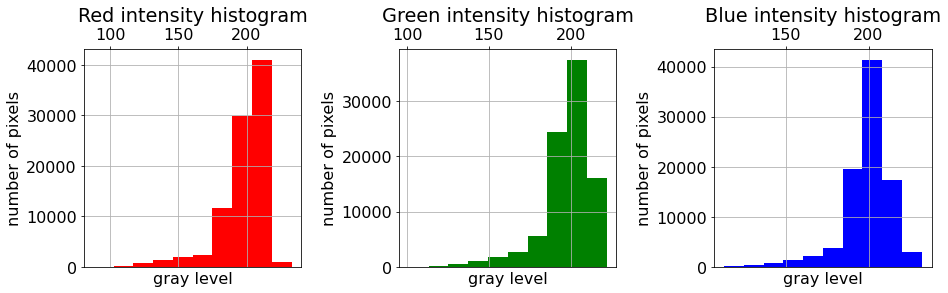

In [5]:
fig, ax= plt.subplots(1,3,figsize=[16,4])
ax[0].hist(image[...,0].flatten(),color='red')
ax[0].set_title('Red intensity histogram')
ax[0].set_box_aspect(1)
ax[0].set_xlabel('gray level')
ax[0].set_ylabel('number of pixels')

ax[1].hist(image[...,1].flatten(),color='green')
ax[1].set_title('Green intensity histogram')
ax[1].set_box_aspect(1)
ax[1].set_xlabel('gray level')
ax[1].set_ylabel('number of pixels')

ax[2].hist(image[...,2].flatten(),color='blue')
ax[2].set_title('Blue intensity histogram')
ax[2].set_box_aspect(1)
ax[2].set_xlabel('gray level')
ax[2].set_ylabel('number of pixels')

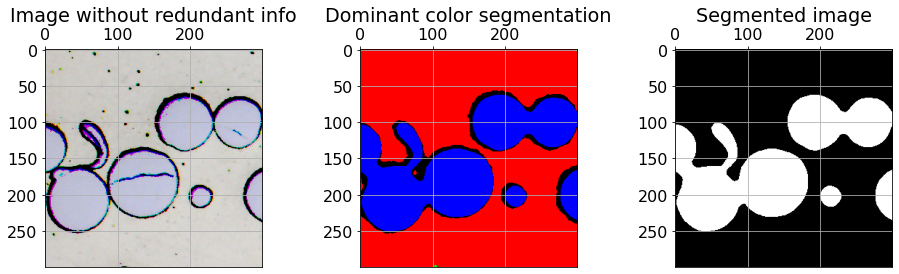

In [6]:
modified_image = np.copy(image)
modified_image[modified_image<=175] = 0
fig, ax= plt.subplots(1,3,figsize=[16,4])
ax[0].set_title('Image without redundant info')
ax[0].imshow(modified_image)

flatten_image = image.reshape(-1,3)
flatten_color_segmented_image = np.zeros_like(flatten_image)
idx = np.argmax(flatten_image,axis=1)
flatten_color_segmented_image[idx==0]=[255,0,0]
flatten_color_segmented_image[idx==1]=[0,255,0]
flatten_color_segmented_image[idx==2]=[0,0,255]
color_segmented_image = flatten_color_segmented_image.reshape(image.shape)

kernel_size = 17
color_segmented_image = cv.medianBlur(color_segmented_image,kernel_size)
ax[1].set_title('Dominant color segmentation')
ax[1].imshow(color_segmented_image)

binary_image = cv.cvtColor(color_segmented_image,cv.COLOR_RGB2GRAY)
rng = (binary_image>15) & (binary_image<30)
binary_image[rng]=1
binary_image[~rng]=0
ax[2].set_title('Segmented image')
ax[2].imshow(binary_image,cmap="gray")

## Part 3: binary image manipulation

Morphological operations:
- Dilation - grow image regions [set pixel to max (white) within a box]
- Erosion - shrink image regions [set pixel to min (black) within a box]
- Opening - structured removal of image region boundary pixels [erosion followed by a dilation, remove white dots]
- Closing - structured filling in of image region boundary pixels [a dilation followed by an erosion, remove black dots]

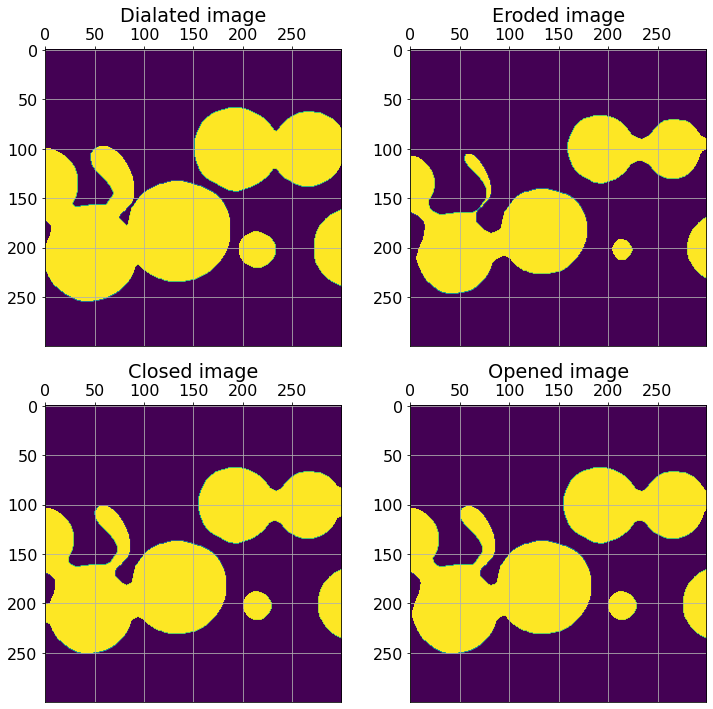

In [7]:
# kernel = np.ones((3, 3), np.uint8)/9
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

itr = 2
image_dialated = cv.morphologyEx(binary_image, cv.MORPH_DILATE, kernel, iterations=itr)
image_eroded = cv.morphologyEx(binary_image, cv.MORPH_ERODE, kernel, iterations=itr)
image_opening = cv.morphologyEx(binary_image, cv.MORPH_OPEN, kernel, iterations=itr)
image_closing = cv.morphologyEx(binary_image, cv.MORPH_CLOSE, kernel, iterations=itr)

fig, ax= plt.subplots(2,2,figsize=[12,12])
ax[0,0].set_title('Dialated image')
ax[0,0].imshow(image_dialated)
ax[0,1].set_title('Eroded image')
ax[0,1].imshow(image_eroded)
ax[1,0].set_title('Closed image')
ax[1,0].imshow(image_closing)
ax[1,1].set_title('Opened image')
ax[1,1].imshow(image_opening)

# np.savez_compressed( 'data.npz', image, kernel)


- Circle detection algorithm
- Statistical information from an image

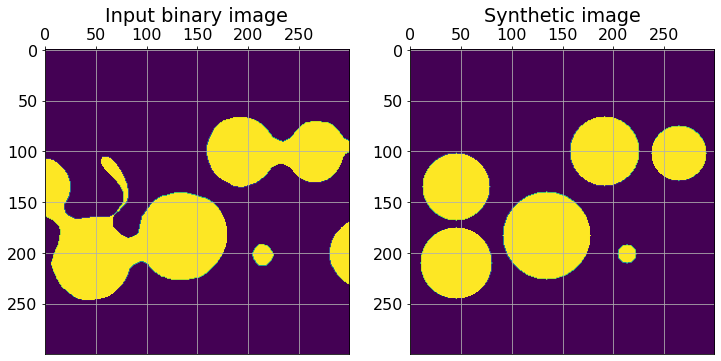

In [8]:
img_255 = np.array(image_eroded * 255,dtype=np.uint8)
synthetic_image = np.zeros_like(image_eroded)

circles = cv.HoughCircles(img_255,cv.HOUGH_GRADIENT,1.0,50,param1=1e-6,param2=12,minRadius=3,maxRadius=80)
circles = np.uint16(circles)

for i in circles[0,:]:
  synthetic_image = cv.circle(synthetic_image, (i[0],i[1]), i[2], 1, -1)

fig, ax= plt.subplots(1,2,figsize=[12,8])
ax[0].set_title('Input binary image')
ax[0].imshow(img_255)
ax[1].set_title('Synthetic image')
ax[1].imshow(synthetic_image)

In [9]:
from scipy.signal import savgol_filter

def extract_plot_statistics(h_stripe,v_stripe,sg_window,sg_order):
    h_vol_av=[]
    v_vol_av=[]
    reinforcement_depth = []

    for i in np.arange(0,synthetic_image.shape[0] - h_stripe):
        id_range = range(i, i + h_stripe)
        h_vol_av.append( np.count_nonzero(synthetic_image[id_range,:]) / synthetic_image[id_range,:].size)

    for i in np.arange(0,synthetic_image.shape[1] - v_stripe):
        id_range = range(i, i + v_stripe)
        v_vol_av.append( np.count_nonzero(synthetic_image[:,id_range]) / synthetic_image[:,id_range].size)

        reinforcement_depth.append(np.nonzero(np.sum(synthetic_image[:,id_range],axis=1))[-1][-1] if np.sum(synthetic_image[:,id_range]) > 0 else 0)
   
    smotthed_h_vol_av = savgol_filter(h_vol_av, sg_window, sg_order)
    smotthed_v_vol_av = savgol_filter(v_vol_av, sg_window, sg_order)
    smoothed_reinforcement_depth = savgol_filter(reinforcement_depth, sg_window, sg_order)

    smotthed_h_vol_av[smotthed_h_vol_av<=0] = 0
    smotthed_v_vol_av[smotthed_v_vol_av<0] = 0
    smoothed_reinforcement_depth[smoothed_reinforcement_depth<0] = 0

    fig, ax= plt.subplots(2,3,figsize=[16,10])
    ax[0,0].set_visible(False)
    ax[0,2].set_visible(False)

    ax[1,0].plot(h_vol_av,range(len(h_vol_av)),'k', linestyle='--',linewidth=2)
    ax[1,0].plot(smotthed_h_vol_av,range(len(h_vol_av)),'k',linewidth=3)
    ax[1,0].invert_xaxis()
    ax[1,0].invert_yaxis()
    ax[1,0].set_box_aspect(1)
    # ax[1,0].set_title('vol frac per row (depth)')
    ax[1,0].set_xlabel('volume fraction w.r.t. depth[-]')
    ax[1,0].xaxis.set_label_position("top")
    
    ax[0,1].plot(range(len(v_vol_av)),v_vol_av,'k', linestyle='--',linewidth=2)
    ax[0,1].plot(range(len(v_vol_av)),smotthed_v_vol_av,'k',linewidth=3)
    ax[0,1].set_title('vol frac per column')
    ax[0,1].set_ylabel('volume fraction [-]')
    ax[0,1].set_box_aspect(1)

    ax[1,1].imshow(synthetic_image)
    ax[1,1].set_xticks([])
    ax[1,1].set_yticks([])

    ax[1,2].plot(reinforcement_depth,'k', linestyle='--',linewidth=2)
    ax[1,2].plot(smoothed_reinforcement_depth,'k',linewidth=3)
    ax[1,2].set_title('reinforcement depth')
    ax[1,2].set_ylabel('depth [pixels]')
    ax[1,2].invert_yaxis()
    ax[1,2].set_box_aspect(1)
    ax[1,2].yaxis.tick_right()
    ax[1,2].yaxis.set_label_position("right")

In [10]:
from ipywidgets import interact, widgets

interact(extract_plot_statistics,h_stripe=widgets.IntSlider(min=1, max=29, step=1, value=1),
         v_stripe=widgets.IntSlider(min=1, max=29, step=1, value=1),
         sg_window=widgets.IntSlider(min=3, max=50, step=2, value=3),
         sg_order=widgets.IntSlider(min=1, max=5, step=1, value=1))

interactive(children=(IntSlider(value=1, description='h_stripe', max=29, min=1), IntSlider(value=1, descriptio…

<function __main__.extract_plot_statistics(h_stripe, v_stripe, sg_window, sg_order)>